In [25]:
!pip install yfinance pandas
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [24]:
tesla_ticker = yf.Ticker("TSLA")

tesla_data = tesla_ticker.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.to_csv('tesla_data.csv', index=False)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [37]:
soup = BeautifulSoup(html_data, 'html.parser')
response = requests.get(url)
html_data = response.text

In [36]:
tables = pd.read_html(html_data)
tesla_revenue = tables[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '', regex=False).str.replace('$', '', regex=False)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30       31
49  2010-06-30       28
50  2010-03-31       21
52  2009-09-30       46
53  2009-06-30       27


In [12]:
!pip install matplotlib pandas

In [44]:
!pip install matplotlib pandas
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
def make_graph(stock_data, revenue_data, company_name):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
   
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
  
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    
    plt.title(f'{company_name} Stock Price and Revenue')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
   
    plt.show()

In [42]:
tesla_data = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=30, freq='M'),
    'Close': [i * 10 for i in range(1, 31)]
})

tesla_revenue = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=10, freq='Q'),
    'Revenue': [i * 1000 for i in range(1, 11)]
})

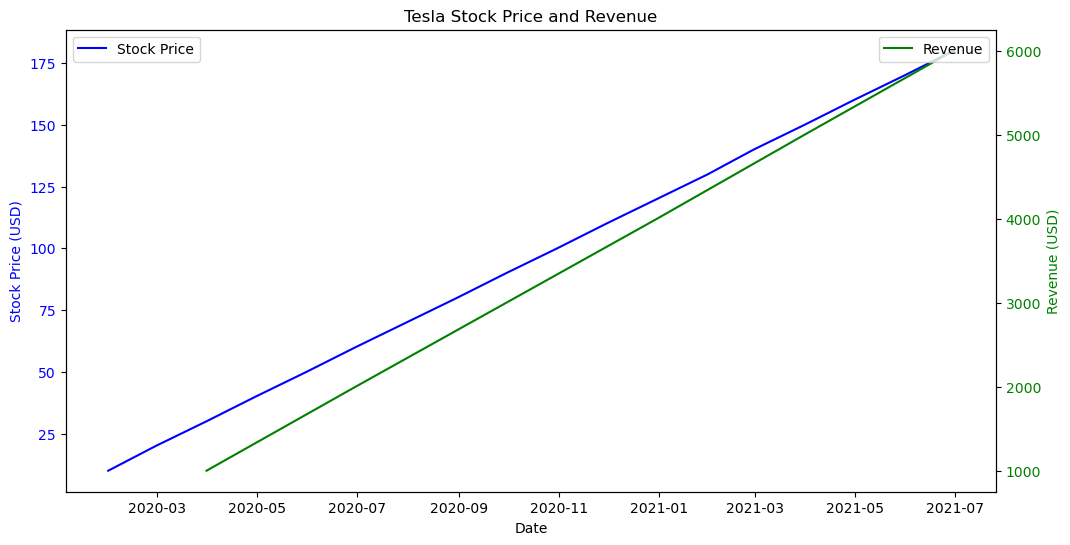

In [45]:
make_graph(tesla_data, tesla_revenue, 'Tesla')